In [1]:
%matplotlib notebook

import sys
import os
import logging
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib.patches as patches

from astropy.modeling import models, fitting

sys.path.append("../DesignTool")
sys.path.append("../DesignTool/smdtLibs/")

from configFile import ConfigFile, getDefaultConfig
from targets import TargetList
from inOutChecker import InOutChecker
from maskDesignFile import (
    MaskDesignOutputFitsFile,
    outputAsList,
    MaskDesignInputFitsFile,
)
import maskLayouts
from slitmaskDesignTool import SlitmaskDesignTool

import utils
from testSlitMask import TestSlitmask, testMaskDesign
from DistortionUtil import projectTargetXYs
from drawUtils import drawPatch
from diffSlitMask import DiffSlitMask
from Test_All import Test_Inputs

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
logging.disable()

<IPython.core.display.Javascript object>

In [4]:
# File1 = "../DeimosExamples/EvanKirby/n2419c.fits"
# File2 = "../DeimosExamples/EvanKirby/n2419c_test.fits"
# File1 = "../DeimosExamples/EvanKirby/LeoIa.fits"
# File2 = "../DeimosExamples/EvanKirby/LeoIa_test.fits"
File1 = "../DeimosExamples/MihoIshigaki/CetusIII.fits"
File2 = "../DeimosExamples/MihoIshigaki/CetusIII_test.fits"

<IPython.core.display.Javascript object>

In [5]:
diffTest = DiffSlitMask(File1, File2)

<IPython.core.display.Javascript object>

(0      36.386302
1     -86.898661
2    -138.121471
3    -152.605043
4    -121.527002
5     -45.860440
6    -116.261399
7     -50.117414
8      84.474378
9      98.660599
10   -241.359684
11    278.338284
12   -357.591667
13   -331.954974
14   -213.511504
15    322.892162
16   -312.750568
17     13.937154
18    127.673370
19     -7.055021
20   -193.342866
21    159.498507
22   -202.194333
23   -111.935075
24     19.413569
25     66.080914
26    113.738210
27   -343.392954
28    148.603533
29    140.473923
30     52.015187
31    208.206558
32     55.993702
33   -278.170661
34    317.704839
44    289.180109
45    239.811572
46    179.709946
dtype: float64, 0     104.983796
1      59.248555
2      27.527871
3      17.769605
4      25.672658
5      79.246710
6     162.863187
7      61.623230
8      13.140520
9      80.243736
10    207.022488
11    144.502615
12    122.425199
13     53.787569
14    169.309531
15    155.683371
16    114.352658
17     48.533106
18    162.073633
19     11.5317

<IPython.core.display.Javascript object>


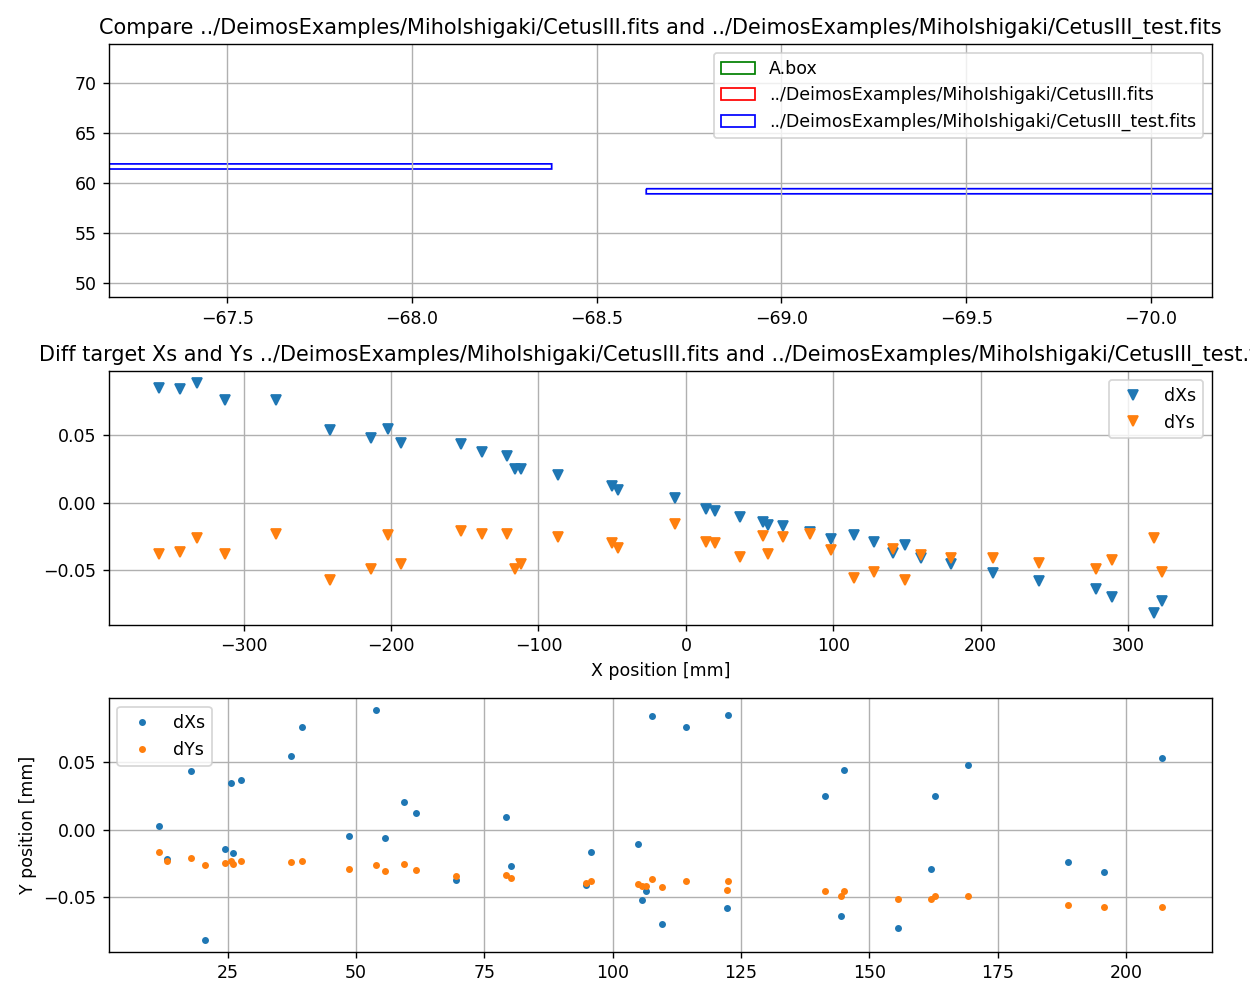

<IPython.core.display.Javascript object>

In [6]:
diffs = diffTest.calcDiffs()
print(diffTest.target2XYs)
diffTest.plotDiffs(diffs)

In [7]:
xs2, ys2 = diffTest.target2XYs
xs1, ys1 = diffTest.target1XYs

<IPython.core.display.Javascript object>

In [8]:
plist = ["pcode", "OBJECT", "slitX1_x", "slitY1_x", "slitX1_y"]
slits = diffTest.joinedSlits
slits = slits[slits.pcode > 0]
slits[np.isnan(slits.slitX1_y)][plist], xs2[np.isnan(xs2)]

(Empty DataFrame
 Columns: [pcode, OBJECT, slitX1_x, slitY1_x, slitX1_y]
 Index: [],
 Series([], dtype: float64))

<IPython.core.display.Javascript object>

In [9]:
pdeg = 4
model0 = models.Polynomial2D(degree=1)
xfitter = fitting.LinearLSQFitter()
yfitter = fitting.LinearLSQFitter()

xfitted = xfitter(model0, xs2, ys2, xs1)
yfitted = yfitter(model0, xs2, ys2, ys1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


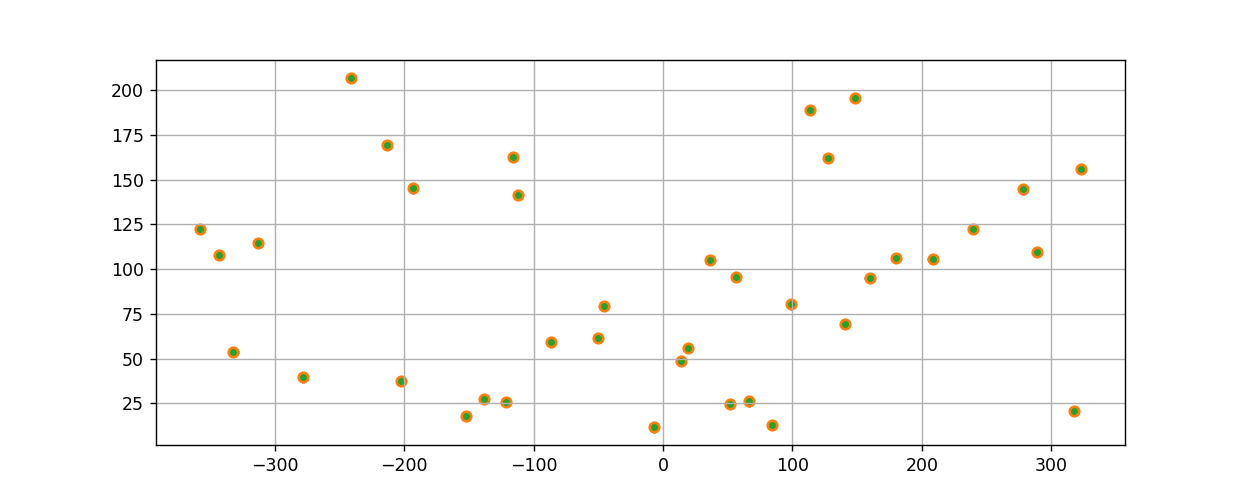

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(10, 4))
plt.scatter(xs2, ys2, marker="+")
plt.scatter(xs1, ys1, marker="o")
plt.scatter(xfitted(xs2, ys2), yfitted(xs2, ys2), marker=".")
plt.grid()

In [11]:
print(list(zip(xfitted.param_names, xfitted.parameters)))
print(list(zip(yfitted.param_names, yfitted.parameters)))

[('c0_0', -0.0014555223515448003), ('c1_0', 1.0002456871107328), ('c0_1', 1.136607051081589e-05)]
[('c0_0', 0.01855192705618447), ('c1_0', 9.90747986283642e-06), ('c0_1', 1.000193793180604)]


<IPython.core.display.Javascript object>

In [12]:
np.std(xs1 - xfitted(xs2, ys2)), np.std(ys1 - yfitted(xs2, ys2))

(0.0034740450756795523, 0.0011239362220277268)

<IPython.core.display.Javascript object>

In [13]:
np.std(xs1 - xs2), np.std(ys1 - ys2)

(0.04783870853272415, 0.011185013546124552)

<IPython.core.display.Javascript object>

In [14]:
0.9998 * 0.99979

0.999590042

<IPython.core.display.Javascript object>